⚠️ This project is mandatory for certification bloc #2.

![Tinder](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Tinder-Symbole.png)

# Speed Dating avec Tinder

## Description de la société 📇

<a href="https://tinder.com/" target="_blank">Tinder</a> est une **application de rencontres en ligne et de réseautage géosocial**.
Sur Tinder, les utilisateurs **“swipent à droite”** pour indiquer qu’ils aiment un profil, ou **“swipent à gauche”** pour passer — chaque profil comprenant **des photos, une courte biographie et une liste d’intérêts**.

L’application a été **lancée en 2012** par **Sean Rad**, lors d’un **hackathon organisé au sein de l’incubateur Hatch Labs**, à **West Hollywood (Californie)**.

# Étude Speed Dating — Analyse exploratoire et modélisation

Ce notebook présente une analyse académique du jeu de données *Speed Dating*, avec une démarche structurée : contexte, objectifs, préparation des données, EDA, modélisation et discussion des limites.

## Projet 🚧

L’équipe marketing a besoin d’aide pour un nouveau projet.
Elle observe une **diminution du nombre de matchs** et cherche à comprendre **ce qui favorise l’attirance mutuelle entre deux individus**.

Pour ce faire, Tinder a organisé une **expérience de speed dating** : les participants ont dû fournir à l’entreprise de **nombreuses informations personnelles**, susceptibles de **refléter leur futur profil sur l’application**.

Tinder a ensuite **collecté les données issues de cette expérience**.
Chaque ligne du jeu de données correspond à **un rendez-vous entre deux personnes** et indique si chacune d’elles a **secrètement exprimé le souhait de revoir l’autre** pour un second rendez-vous.


## Projet — Contexte et objectifs 🚧

**Objectif général :** identifier les déterminants d'une seconde rencontre.

**Objectifs spécifiques :**
- documenter la structure des données (variables, valeurs manquantes, distributions) ;
- explorer les corrélations et éventuelles non‑linéarités ;
- proposer une première base de modèles prédictifs et d'interprétabilité (coefficients, importances).

## Objectifs 🎯

Utiliser le jeu de données pour **comprendre ce qui suscite l’intérêt mutuel entre deux personnes** et les conduit à **accepter un second rendez-vous** :

* Vous pouvez utiliser des **statistiques descriptives** ;
* Vous pouvez également vous appuyer sur des **visualisations** pour appuyer votre analyse.


## Périmètre du Projet 🖼️

Les données ont été collectées auprès de participants à des **événements expérimentaux de speed dating** organisés entre **2002 et 2004**.
Lors de ces sessions, chaque participant avait un **rendez-vous de quatre minutes** avec chaque personne du sexe opposé.
À la fin de ces quatre minutes, les participants indiquaient s’ils **souhaitaient revoir leur partenaire**.
Ils devaient également **évaluer leur rendez-vous** selon **six critères** :

* **Attractivité**,
* **Sincérité**,
* **Intelligence**,
* **Sens de l’humour / Amusement**,
* **Ambition**,
* **Centres d’intérêt communs**.

Le jeu de données comprend également des **questionnaires complémentaires**, remplis à différents moments du processus.
Ces champs couvrent notamment :

* les **données démographiques**,
* les **habitudes de rencontre**,
* la **perception de soi** sur certains traits,
* les **croyances sur ce que les autres recherchent** chez un partenaire,
* et des informations sur le **style de vie**.

Pour plus de détails, se référer au document **Speed Dating Data Key**.


[Dataset](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv)

[Dataset Description](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc)

## Conseils 🦮

Pour vous aider à réussir ce projet, voici quelques **pistes d’exploration des données** :

Idées d’analyse exploratoire :

* Quels sont les **traits les moins recherchés** chez un partenaire masculin ? Et ces critères diffèrent-ils pour les partenaires féminins ?
* Quelle est la **place réelle de l’apparence physique** dans le choix d’un partenaire, comparée à l’importance que les gens **pensent** lui accorder ?
* Les **centres d’intérêt communs** sont-ils plus importants qu’un **arrière-plan culturel ou ethnique partagé** ?
* Les individus peuvent-ils **évaluer avec précision la valeur** qu’ils projettent sur le marché des rencontres ?
* Pour obtenir un **second rendez-vous**, vaut-il mieux être le **premier** ou le **dernier rendez-vous** de la soirée ?


## Livrable 📬

Pour finaliser ce projet, votre équipe doit fournir :

Un **notebook** contenant :

* des **statistiques descriptives** ;
* des **visualisations** ;
* des **légendes et interprétations** expliquant en quoi ces statistiques et visualisations éclairent les **raisons pour lesquelles les personnes acceptent un second rendez-vous**.


# Rendu
## Étude Speed Dating — Analyse exploratoire et modélisation

Ce notebook présente une analyse académique du jeu de données *Speed Dating*, avec une démarche structurée : contexte, objectifs, préparation des données, EDA, modélisation et discussion des limites.


## Imports

In [5]:
%pip install dash
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from plotly.subplots import make_subplots

Note: you may need to restart the kernel to use updated packages.


## Chargement des données

Chargement du fichier source et contrôle basique de l'intégrité : dimensions, schéma, aperçus tabulaires. 
Le fichier a un problème d'encodage. Il est nécessaire de l'importer en utilisant l'encodage ISO-8859-1.

In [6]:
pd.options.display.max_rows = 1000 # le fichier est long
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
speed_dating = pd.read_csv('./Data/Speed+Dating+Data.csv', encoding="ISO-8859-1") 

## Exploration des données

Aperçu des premières lignes et des informations générales (`info()`, `describe()`), y compris le taux de valeurs manquantes par variable.

In [7]:
print("Information sur le dataset:")
display(speed_dating.info())
print("Description du dataset:")
display(speed_dating.describe())
print("Aperçu du début du dataset:")
display(speed_dating.head())
print("Analyse des valeurs manquantes par colonne :")
display(speed_dating.isnull().sum())
display(f" nombre totalde valeurs manquantes: {speed_dating.isnull().sum().sum()}")

Information sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


None

Description du dataset:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

Aperçu du début du dataset:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Analyse des valeurs manquantes par colonne :


iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

' nombre totalde valeurs manquantes: 432016'

Avec 432016 valeurs inexistantes dans ce dataste, le fichier de données contient réellement beaucoup de données manquantes. Le graphe ci-dessous montre la mauvaise qualité des données.

<Axes: title={'center': 'Données manquantes en %'}, ylabel='Taux de données manquantes par variable'>

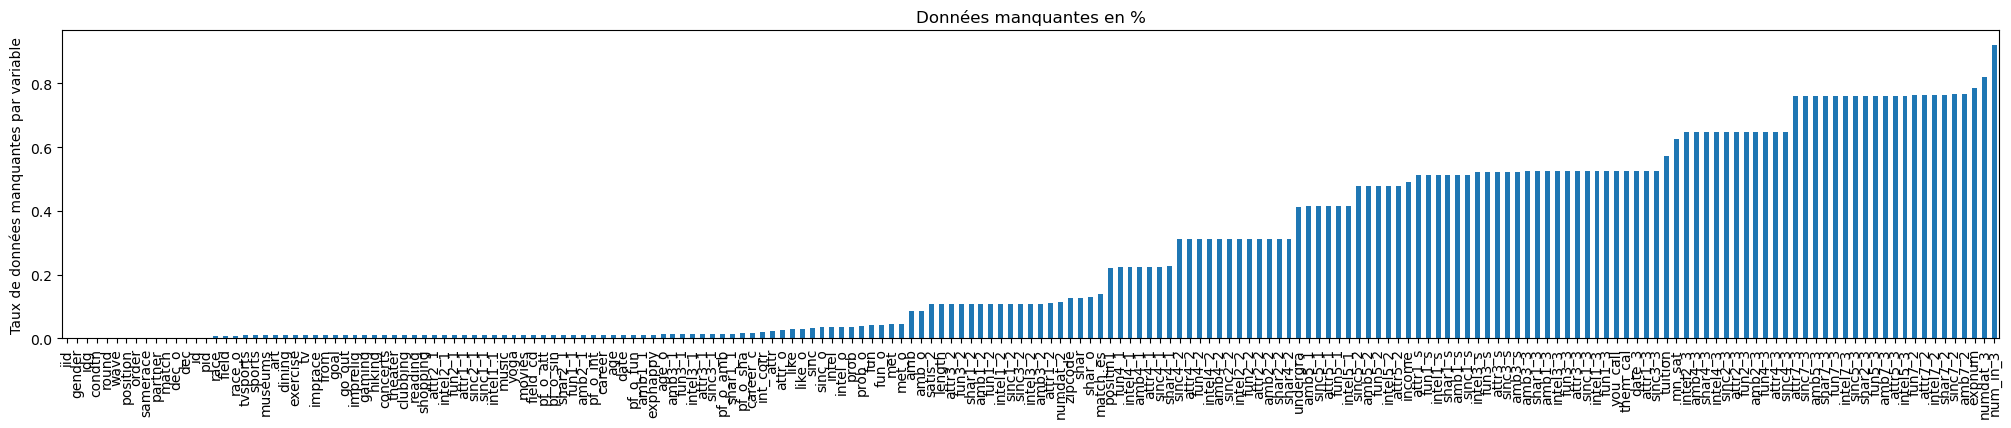

In [8]:
# Large amount of data missing on some characteristics, most because of dependency on other data, some without context.
speed_dating.isna().mean().sort_values().plot(kind="bar", figsize=(25, 4),
            title="Données manquantes en %", ylabel="Taux de données manquantes par variable")


In [9]:
nb_colonne=len(speed_dating.columns)  # nombre de colonnes de données


In [10]:
nb_colonne_OK_50=(speed_dating.isna().mean()<0.5).sum()
nb_colonne_OK_25=(speed_dating.isna().mean()<0.25).sum()
print(f"Nombre de colonnes avec moins de 50% de valeurs manquantes : {nb_colonne_OK_50} sur {nb_colonne} colonnes")
print(f"Nombre de colonnes avec moins de 25% de valeurs manquantes : {nb_colonne_OK_25 } sur {nb_colonne} colonnes")

Nombre de colonnes avec moins de 50% de valeurs manquantes : 136 sur 195 colonnes
Nombre de colonnes avec moins de 25% de valeurs manquantes : 112 sur 195 colonnes


En ne gardant que les colonnes ayant plus 50% de données fournies, il ne reste plus que 136 colonnes sur les 195 initales, voir seuelmement 112 sur les 195 si l'on veut au moins 3/4 de valeurs non manquantes dans les colonnes. Cela reflète un sondage assez médiocre.


Nous sommes plus en présence d'un dataswamp plutôt qu'un datalake.


## Analyse des données

### Le Genre et l'Âge
On commence par analyser classiquement la répartition entre les hommes et les femmes.

In [11]:

speed_dating['genre_nom'] = speed_dating['gender'].apply(lambda x: 'Femme' if x==0 else 'Homme')              
fig = px.histogram(speed_dating, x= 'gender', 
                   color= 'genre_nom',
                   labels = { 'gender' : 'Genre'},
                   barmode="group",
                   text_auto=True,
                   title="Répartition Homme Femme" )
fig.update_layout(height = 600, width= 1200,yaxis_title="Nombre",legend_title_text='Genre')




<a name="genre">Genre : </a>La répartition est équilibrée entre les genres (4184 Femme et 4194 homme). 

Passons maintenant à l'analyse de la répartition des âges de la population.

In [12]:
# age vs gender
fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Histogram(x= speed_dating[speed_dating['gender'] == 0].age, name= 'Femme', nbinsx=74 ), row=1, col=1)
fig.add_trace(go.Histogram(x= speed_dating[speed_dating['gender'] == 1].age, name= 'Homme' , nbinsx=74), row=1, col=1)
fig.add_trace(go.Box(y= speed_dating[speed_dating['gender'] == 0].age, x= [0] * speed_dating[speed_dating['gender'] == 0].shape[0], name= 'Femme'),row=1, col=2)
fig.add_trace(go.Box(y= speed_dating[speed_dating['gender'] == 1].age, x= [1] * speed_dating[speed_dating['gender'] == 1].shape[0], name= 'Homme'),row=1, col=2)
fig.add_trace(go.Histogram(x=speed_dating[speed_dating['gender'] == 0].gender, bingroup="group" , name= 'Femme'),row=2, col=1)
fig.add_trace(go.Histogram(x=speed_dating[speed_dating['gender'] == 1].gender, bingroup="group",  name= 'Homme'),row=2, col=1)
fig.update_layout(height=600, width=1200, barmode='stack', title_text="Répartion des âges chez les hommes et les femmes",legend_title='genre')
fig.show()

Les hommes sont un peu plus âgés que les femmes mais la population global est jeune avec une moyenne d'age de . Il s'agit de considération faite malgrès l'absence de nombreuses deonnées d'ages (104 valeurs). Il est interessant de constater qu'en comparant le graphique de la répartition d'âge en fonction du genre avec [celui](#genre) équilibré des répartitions de genre de la population plus de femmes que d'hommes n'ont pas donné leur âge !

### Le Speed Dating est-ce que ça marche.

Avant d'aller plus loin, examinons, si ce type d'atelier est efficace et en déterminant le pourcentage de match et de nos matchs, à l'issue de ses rencontres et combien de personnes de l'évènement ont obtenus un match.

In [13]:

fig = go.Figure(data=[
    go.Pie(values= speed_dating['match'].value_counts(), 
           labels= ['Non', 'Oui'],
           pull=[0, 0.20], 
           marker_colors= ['#FF4040', '#7AB02C'])
])

fig.update_layout(height = 600, width= 1200,legend_title_text='Match', title=f"Nombre de matches et de non matches.")

In [14]:
cross_match=pd.crosstab(index=speed_dating['match'],columns="count")
display(cross_match)
date_match = int(cross_match.iloc[1])/(int(cross_match.iloc[1])+int(cross_match.iloc[0]))*100
print(date_match)

col_0,count
match,
0,6998
1,1380


16.47171162568632


/var/folders/6m/4bfx39_j0519_3g3r0sp6fbw0000gn/T/ipykernel_27444/384853591.py:3: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



Il y a donc une probabilité de 1380/(1380+6998) soit 16,47% de chance d'avoir un match.


In [15]:
speed_dating['dec_o_nom']=speed_dating['dec_o'].map({0:'non',1:'oui'})
speed_dating['match_nom']=speed_dating['match'].map({0:'Non match',1:'Match'})
fig=px.histogram(speed_dating,x='match_nom',color='match_nom',nbins=2,text_auto=True,barmode="group")
fig.update_xaxes(title_text= "Décisions")
fig.update_yaxes(title_text= "Nombre")
fig.update_layout(height = 600, width= 1200,legend_title_text='Genre', title="Chance d'un match")
fig.show()

pd.crosstab(index=speed_dating.genre_nom, columns=speed_dating.match)
display(pd.crosstab(index=speed_dating.genre_nom, columns=speed_dating.match))

match,0,1
genre_nom,,
Femme,3494,690
Homme,3504,690


Force est de constater que ce type de activité n'a pas un très bon rendement. En effet, seulement moins d'un cinquième des rencontres finissent par un match.

Suivant le genre, il s'agit de savoir si on veut revoir l'autre ou pas après l'entretien.

In [16]:
fig=px.histogram(speed_dating,x='dec_o_nom',color='genre_nom',nbins=4,text_auto=True,barmode="group")
fig.update_xaxes(title_text= 'Décisions')
fig.update_yaxes(title_text= "Nombre")
fig.update_layout(height = 600, width= 1200,legend_title_text='Genre', title='Décisions du partenaire par genre')
fig.show()
display(pd.crosstab(index=speed_dating.genre_nom, columns=speed_dating.dec_o))

dec_o,0,1
genre_nom,,
Femme,2198,1986
Homme,2665,1529


In [17]:

no_match = len(speed_dating[(speed_dating['dec_o']==0) & (speed_dating['dec']==1)]) 
+ len(speed_dating[(speed_dating['dec_o']==1) & (speed_dating['dec']==0)]) 
disappointed_ratio = no_match / len(speed_dating.index)
display(f"{(disappointed_ratio*100):.2f}% said yes but didn't match !")
print("Ainsi on a sur \t \t \t \t",len(speed_dating.index)," tentatives.")
print ("Un des deux déçus : \t \t \t", no_match, " cas.")
print("Non mutuel : pas de problème !!! \t",len(speed_dating[(speed_dating['dec_o']==0) & (speed_dating['dec']==0)]), " cas.")
print("Oui des deux côtés : Match !!! \t \t",len(speed_dating[(speed_dating['dec_o']==1) & (speed_dating['dec']==1)]), " cas .") 

homme_ok=speed_dating[speed_dating['gender']==1]
print("Homme rejeté")
display(homme_ok[ (homme_ok['dec'] == 1) & (homme_ok['dec_o']==0) ].info())
print("Femme rejetée")
femme_ok=speed_dating[speed_dating['gender']==0]
femme_ok[ (femme_ok['dec'] == 1) & (femme_ok['dec_o']==0) ].info()


"25.52% said yes but didn't match !"

Ainsi on a sur 	 	 	 	 8378  tentatives.
Un des deux déçus : 	 	 	 2138  cas.
Non mutuel : pas de problème !!! 	 2725  cas.
Oui des deux côtés : Match !!! 	 	 1380  cas .
Homme rejeté
<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 116 to 8364
Columns: 198 entries, iid to match_nom
dtypes: float64(174), int64(13), object(11)
memory usage: 2.0+ MB


None

Femme rejetée
<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 7893
Columns: 198 entries, iid to match_nom
dtypes: float64(174), int64(13), object(11)
memory usage: 1.3+ MB


Environ **25,52 %** des participants ont probablement été **déçus après avoir dit “oui” à quelqu’un qui ne les appréciait pas en retour** 💔.

Les **hommes** ont été **plus souvent rejetés** après un “oui” espéré, avec **1 299 cas recensés**, contre **839 pour les femmes**,
sur un total de **8 378 rendez-vous** enregistrés pour les deux sexes.


In [18]:
cross_2nd_date = pd.crosstab(index=speed_dating['date_3'],columns="count")
calc_2nd_date = int(cross_2nd_date.iloc[1])/(int(cross_2nd_date.iloc[1])+int(cross_2nd_date.iloc[0]))*100
# Still only 37.7% chance of a 2nd date even after a match
display(f"Only {calc_2nd_date:.2f}% chance of a second date")
# Higher numbers of actual 2nd dates than matches
# Females have more success
pd.crosstab(index=speed_dating['date_3'],columns="count")

/var/folders/6m/4bfx39_j0519_3g3r0sp6fbw0000gn/T/ipykernel_27444/3874190380.py:2: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Only 37.70% chance of a second date'

col_0,count
date_3,
0.0,2476
1.0,1498


Une **probabilité de 16,47 % d’obtenir un match** et de **17,88 % d’obtenir un second rendez-vous** ? 🤔
C’est effectivement **un peu surprenant**…

Cela peut s’expliquer par de **légères incohérences dans la manière dont les réponses ont été enregistrées** (par exemple, certains participants ont peut-être déclaré vouloir un second rendez-vous alors que le “match” mutuel n’était pas confirmé).
Autre possibilité : il peut y avoir **des doublons ou des valeurs manquantes** qui faussent légèrement les proportions.

En somme, cette différence minime **reflète surtout la nature expérimentale du jeu de données** plutôt qu’un véritable phénomène comportemental.



In [19]:
# Match est-ce un problème ?
seconde_date= speed_dating.date_3.groupby(speed_dating.match).value_counts()
seconde_date_match = speed_dating.date_3[speed_dating['match_nom']=='Non match'].value_counts()
seconde_date_nomatch = speed_dating.date_3[speed_dating['match_nom']=='Match'].value_counts()


In [20]:
seconde_date_match.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, 0.0 to 1.0
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0 bytes


In [21]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(y= seconde_date_match),row=1, col=1)  
fig.add_trace(go.Bar(y= seconde_date_nomatch), row=1, col=1)
fig.update_layout(height=600, width=1200, barmode='stack', title_text="Est-ce qu'un match importe pour un second rendez-vous ?",legend_title='Match')
fig.update_xaxes(title_text= "Second rendez-vous")
fig.update_yaxes(title_text= "Nombre")
fig.show()

In [22]:

fig=px.histogram(speed_dating[speed_dating['numdat_3']>0],x='numdat_3',color='genre_nom',nbins=10,text_auto=True,barmode="group")
fig.update_xaxes(title_text= 'Combien de partenaires ?')
fig.update_yaxes(title_text= "Nombre")
fig.update_layout(height = 600, width= 1200,legend_title_text='Genre', title="Dates avec différentes personnes après l'évènement")
fig.show()

In [23]:

fig=px.histogram(speed_dating[speed_dating['you_call']>0],x='you_call',color='genre_nom',nbins=21,text_auto=True,barmode="group")
fig.update_xaxes(title_text= "Nombre d'appels")
fig.update_yaxes(title_text= "Nombre")
fig.update_layout(height = 600, width= 1200,legend_title_text='Genre', title="Appel pour monter une date après l'évènement")
fig.show()


Les participants avaient 17,88 % de chances d’obtenir un second rendez-vous pour chaque interaction durant l’événement. <br>
Un match (présent dans 16,47 % des cas) augmentait légèrement cette probabilité à 26,01 %, tandis qu’en l’absence de match, la chance de décrocher un second rendez-vous restait à 16,27 %.  
La persévérance finit donc parfois par payer ! Les participants ne se sont pas toujours appuyés sur les résultats immédiats de l’événement pour organiser leurs rendez-vous ultérieurs.  
La plupart n’ont poursuivi qu’une seule personne après l’événement — ce qui peut être interprété comme un signe de réussite.
Cependant, quelques-uns ont multiplié les tentatives pour trouver “la bonne personne” :  
jusqu’à 9 rendez-vous avec des partenaires différents pour certaines femmes,
et jusqu’à 21 appels à des femmes différentes pour certains hommes !   
- Les hommes se sont montrés nettement plus insistants à cet égard.



### Influence de l'ethnie

Les ethnies sont données par un entier dont le tableau de correspondance est donné ci-dessous: 
| Ethnie | Nombre |
|--------|--------|   
|Black/African  American |1|
|European/Caucasian-American | 2 |
|Latino/Hispanic American | 3  |
|Asian/Pacific Islander/Asian-American | 4 |
|Native American | 5 |
|Other | 6|


Nous commençons par examiner les statistiques ethnique sur les matchs.

In [24]:
def ethnie(x: int)->str:
    if x==1: 
        return 'Black/African  American'  
    if x==2: 
        return 'European/Caucasian-American'
    if x==3: 
        return 'Latino/Hispanic American'
    if x==4: 
        return 'Asian/Pacific Islander/Asian-American'
    if x==5: 
        return 'Native American'
    if x==6: 
        return 'Other'
    return 'Unknown'

speed_dating['ethnie']=speed_dating['race'].apply(ethnie)
fig = px.histogram(speed_dating[speed_dating['match']==0], x= 'ethnie', 
                   color= 'genre_nom',
  
                   text_auto=True,
                   title="Répartition des ethnies des participants" )
fig.update_layout(height = 600, width= 1200,legend_title_text='Genre')

In [25]:
speed_dating[speed_dating['match']==1]
fig = px.histogram(speed_dating[speed_dating['match']==1], x= 'samerace', 
                   color= 'samerace',
                   text_auto=True,
                   barmode="group",
                   title="Répartition des matchs suivant l'identité d'éthnie" )
fig.update_layout(height = 600, width= 1200,legend_title_text='Ethnie')





In [26]:

fig = px.histogram(speed_dating[speed_dating['match']==0], x= 'samerace', 
                   color= 'samerace',
                   text_auto=True,
                   barmode="group",
                   title="Répartition des non matchs suivant l'identité d'éthnie" )
fig.update_layout(height = 600, width= 1200,legend_title_text='Même ethnie')

L'ethnie n'a pas d'influence sur le match.



### Les Etudes

Passons maintenant à l'examen des qualifications et des domaines d'éducation des participants.

In [27]:

speed_dating['field'] = speed_dating['field'].str.lower()

fig = go.Figure()
for field in speed_dating['field'].value_counts().index:
    fig.add_trace(go.Histogram(y= speed_dating[speed_dating['field'] == field].field, name= f'{field}'))
    
fig = fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(height=1800, width=1200, title_text="Repartition des qualifications et des domaines d'éducation des participants")
fig.show()

Le milieu des affaires ressort en tête des participants. Il est aussi intéressant de constater une large répartition des domaines d'études des participants cependant arrive largement en tête, un public issue d'école de commerce (MBA, affaires internationales et affaires).

In [28]:
fig = make_subplots(cols=3, rows= 3, specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}],
                                            [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
                                            [{"type": "pie"},{"type": "pie"},{"type": "pie"}]])
for i, field in enumerate(speed_dating['field'].value_counts().index[0:9]):
    fig.add_trace(
        go.Pie(labels=speed_dating[speed_dating['field'] == field].genre_nom, title= field.upper(), name= field.upper(), hole=.5), 
        row= int(i/3) + 1, col= int(i%3) + 1)

fig.update_layout(height= 1000, width= 1200, title="Répartition des genres en fonction des qualifications et des domaines d'éducation des participants", legend_title_text='Genre')
fig.show()

Il est interessant de voir que l'on retrouve que certains domaines d'activité professionnelle sont très genrés

In [29]:

fig = px.histogram(x=speed_dating['int_corr'], barmode= 'group', color= speed_dating['match']) 
fig.update_xaxes(title_text= "Corrélation des centres d'intérêt")
fig.update_layout(height = 600, width= 1200,legend_title_text='Match', title="Nombre de matchs / non-matchs en fonction de la corrélation de leurs centres d’intérêt.")

La conclusion de la corrélation des centres d'intérêt montre que **le partage de centre d'intérêt commun n'a que peu  d'influence sur le match (corrélation la plus élevée entre 0,3 et 0,5)** et donc une éventuelle deuxième rencontre. 

### Analyse de l'influence des revenus sur le match et l'éventuel second rendez-vous



In [30]:
# convert to numeric
n_income = []
speed_dating['income'].fillna(-1, inplace= True)
for val in speed_dating['income'].values:
    if val == -1:
        n_income.append(-1)
    else:
        n_income.append(int(val[:val.find('.')].replace(',','')))
speed_dating['income'] = n_income

/var/folders/6m/4bfx39_j0519_3g3r0sp6fbw0000gn/T/ipykernel_27444/2607676611.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [31]:
fig = go.Figure(go.Histogram(x= speed_dating[(speed_dating.match == 1) & (speed_dating.income != -1)].income, nbinsx= 100))
fig.update_layout(height = 600, width= 1200, title="Revenue des personnes dans les matches")
fig.show()

### Analyse de l'évènement et de l'influence de son organisation sur les matchs
Intéressons-nous maintenant au match en fonction de la répartition des tables dans l'évènement.

In [32]:
print("Médiane")
display(speed_dating[["match","gender", "round","order","partner","samerace","age_o","position","age","income","date"]].groupby("match").median(numeric_only=True))
print("Moyenne")
display(speed_dating[["match","gender", "round","order","partner","samerace","age_o","position","age","income","date"]].groupby("match").mean(numeric_only=True))
print("Écart type")
display(speed_dating[["match","gender", "round","order","partner","samerace","age_o","position","age","income","date"]].groupby("match").std(numeric_only=True))

Médiane


,gender,round,order,partner,samerace,age_o,position,age,income,date
match,,,,,,,,,,
0,1.0,18.0,8.0,8.0,0.0,26.0,8.0,26.0,15863.0,5.0
1,0.5,18.0,8.0,8.0,0.0,26.0,8.0,26.0,21597.0,5.0


Moyenne


,gender,round,order,partner,samerace,age_o,position,age,income,date
match,,,,,,,,,,
0,0.500714,16.936410,9.021863,8.966133,0.392969,26.421730,9.067734,26.414391,22620.359960,5.047564
1,0.500000,16.545652,8.450000,8.950725,0.410145,26.077093,8.915942,26.077093,24472.963768,4.799853


Écart type


,gender,round,order,partner,samerace,age_o,position,age,income,date
match,,,,,,,,,,
0,0.500035,4.331232,5.474585,5.514840,0.488445,3.606608,5.548929,3.610348,25453.589849,1.426194
1,0.500181,4.481379,5.466328,5.370848,0.492038,3.323475,5.339405,3.323475,26217.353957,1.517895


In [33]:
fig = px.histogram(x= speed_dating['position'], barmode= 'group', color= speed_dating['match'], labels= speed_dating['position'])
fig.update_xaxes(type='category', title_text= 'Position')
fig.update_layout(height = 700, width= 1200,legend_title_text='Match', title="Nombre de matchs / non-matchs en fonction de l’ordre de rencontre des participants lors de la session de speed dating.")

On constate une sorte de phénomène d'engiuement au début avec plus de matches qui s'émousse dans le temps. La durée de l'évènement et son intensité doit contribuer à une fatigue qui amène à être beaucoup plus sélectif.

## Analyse autour de la décision de match
La variable d'intérêt ici est : Decision (dec) par le décideur (et non la décision du partenaire lui meme)

Les caractéristiques à baseline du partenaire présentes dans le dataset sont : 
- Variables Socio Démographiques : age_o, race_o
- Ce qu'il recherche chez l'autre : pf_o_att (partner’s stated preference at Time 1 for all 6 attributes)
- Comment il a été percu par les décideurs rencontrés : attr sinc intel fun amb shar

Comme tous les participants n'ont pas eu le même nombre de dates et que la tendance à susciter un second rendez-vous peut être différente de personne en personne indépendemment des variables investiguées ici (non independance des données), nous allons transformer le dataset de sorte à ne garder qu'une ligne par partenaire (aggregation sut la variable pid)
La variable d'interet DEC sera donc la proportion de dates pour lesquels le partenaire a suscité la volonté d'un deuxième rendez-vous chez le décideur. 

In [34]:
partner_caract_quant = ['age_o', 
                        'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 
                        'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
partner_caract_qual = ['race_o']

dec_agg_pid = speed_dating.groupby(['pid']).agg({'dec': 'mean', 
                                         'age_o' : lambda x: list(pd.Series.unique(x))[0], 
                                         'gender' : lambda x: list(pd.Series.unique(x))[0], 
                                         'attr' : 'mean',
                                         'sinc' : 'mean',
                                         'intel' : 'mean',
                                         'fun' : 'mean',
                                         'amb' : 'mean',
                                         'shar' : 'mean',
                                         'pf_o_att' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_sin' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_int' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_fun' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_amb' : lambda x: list(pd.Series.unique(x))[0], 
                                         'pf_o_sha' : lambda x: list(pd.Series.unique(x))[0],
                                         'race_o' : lambda x: list(pd.Series.unique(x))[0]})

De manière parallèle à ce qui a été constaté pour les décideurs (même panel), l'attractivité, l'intelligence et l'humour semblent être les qualités les plus fréquemment recherchées par les partenaires. L'ambition et le partage de centres d'intérêt semblent faire partie des éléments les moins déterminants. 
Globalement, les partenaires ont été positivement évalués sur toutes les dimensions, l'ambition et le partage de centre d'intérêt étant là encore les attributs les moins évalués comme détenus par les partenaires. 

In [35]:
df = dec_agg_pid[partner_caract_quant]

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age_o,543.00,26.36,3.77,18.00,24.00,26.00,28.00,55.00
pf_o_att,544.00,22.69,12.97,0.00,15.00,20.00,25.00,100.00
pf_o_sin,544.00,17.29,7.20,0.00,14.93,18.00,20.00,60.00
pf_o_int,544.00,20.17,6.88,0.00,17.29,20.00,23.02,50.00
pf_o_fun,543.00,17.45,6.19,0.00,15.00,18.00,20.00,50.00
pf_o_amb,542.00,10.81,6.23,0.00,5.00,10.00,15.00,53.00
pf_o_sha,541.00,11.83,6.47,0.00,8.33,11.00,16.00,30.00
attr,551.00,6.20,1.18,2.33,5.40,6.28,7.11,8.69
sinc,551.00,7.22,0.69,4.17,6.80,7.30,7.71,9.00
intel,551.00,7.40,0.62,4.88,6.95,7.44,7.88,9.15


In [36]:
labels = ['Age', 'Attentes du partenaire : Attractivité', 'Attentes du partenaire : Sincerité', 'Attentes du partenaire : Intelligence', 'Attentes du partenaire : Amusant', 
          'Attentes du partenaire : Ambition', 'Attentes du partenaire : Partage de centres d intérêt', 
                        'Perception par le décideur : Attractivité', 'Perception par le décideur : Sincerité', 'Perception par le décideur : Intelligence', 'Perception par le décideur : Amusant', 
                        'Perception par le décideur : Ambition', 'Perception par le décideur : Partage de centres d intérêt']
cols = df.columns

fig = go.Figure(go.Histogram(x = dec_agg_pid['age_o']))


my_buttons = [dict(method = "restyle",
                   args = [{'x': [ df[c]], 'name' : c} ],
                   label = labels[k]) for k, c in enumerate(cols)]

fig.update_layout(width=1000, height=600,
                 updatemenus=[dict(active=0,
                                   x= 1, y=1, 
                                   xanchor='left', 
                                   yanchor='top',
                                   buttons=my_buttons)
                              ]) 

Après examen des variables : 
- Age : Mean = 25.8 [18-34]
- Pour les caracteristiques recherchées chez autrui : 
    - Attractivité (Med = 20), Intelligence (Med = 20), Fun (Med = 20)
    - Sincerité (Med = 18)
    - Ambition (Med = 10), Partage de centres d'intéret (Med = 10)
- Perception par autrui : 
    - Sincerité (Med = 7.2), Fun (Med = 6.6), Intelligence (Med = 7.4), Ambition (Med = 6.7)
    - Attractivité (Med = 6.3)
    - Partage de centres d'intérêt (Med = 5.5)

In [37]:
dec_agg_pid['gender'] = dec_agg_pid['gender'].replace([0,1],['Male', 'Female'])

dec_agg_pid['race_o'] = dec_agg_pid['race_o'].replace([1,2,3,4,5,6],['African American', 'Caucasian American', 'Hispanic American', 'Asian American', 'Native American', 'Other'])


In [38]:
variables_interet = ['dec', 'pf_o_sin', 'pf_o_sha', 'attr', 'sinc', 'fun', 'intel', 'amb', 'shar']
fig = px.scatter_matrix(dec_agg_pid,
    dimensions=variables_interet,
    )#color="match"
fig.update_layout(height = 700, width= 1200,legend_title_text='Match', title="Correlation autour de la décision.")
fig.show()

Les correlations entre la décision et les caractéristiques recherchées par le partenaire indiquent : 
- Sincerité (-0.21) : Plus le partenaire recherche un décideur sincère, moins il a de chances de susciter un second rdv
- Partage de centres d'intérêt (-0.22) : Plus le partenaire recherche un décideur qui partage avec lui des centres d'intérêt, moins il a de chances de susciter un second rdv

En revanche, comme attendu, plus un partenaire est en moyenne évalué comme
- Attrayant (0.82)
- Sincère (0.28)
- Drole (0.68)
- Intelligent (0.28)
- Ambitieux (0.29)
- Partageant des centres d'intérêt avec le décideur (0.66)
plus il est susceptible de se voir proposer un second rdv. L'attractivité est l'élément fondamental. 

## Approfondissement sur les centres d'interêt et l'affection

Le centre d'interêt et l'affection (caractéristiques personnelles recherchées) semblent être ce qui est le plus pertinent pour un match et un second rendez-vous. Nous focalisons les données dessus et nous recherchons des corrélations.

In [39]:

dating_1 = speed_dating.iloc[:, 11:28]
dating_2 = speed_dating.iloc[:, 30:35]
dating_3 = speed_dating.iloc[:, 39:43]
dating_4 = speed_dating.iloc[:, 45:67]
dating_5 = speed_dating.iloc[:, 69:74]
dating_6 = speed_dating.iloc[:, 87:91]
dating_7 = speed_dating.iloc[:, 97:102]
dating_8 = speed_dating.iloc[:, 104:107]

date = pd.concat([speed_dating.iloc[:, 0],speed_dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [40]:

date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [41]:
date2 = date.dropna()

In [42]:
date2.dtypes

iid           int64
gender        int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64


In [43]:

date3 = date2.drop(['field', 'from', 'career'], axis=1)

In [44]:
# heatmap
corr = date3.corr()
fig = px.imshow(corr,title="Correlation Heatmap")
fig.show()
date2.to_csv('./Data/speed_dating_cleaned.csv', index=False)

En observant la heatmap ci-dessus, plusieurs observations intéressantes se dégagent.  
Par exemple, les hommes (gender = 1) semblent accorder plus d’importance à l’attractivité physique de leur partenaire (attr1_1), tandis que les femmes (gender = 0) semblent privilégier l’ambition (amb1_1).  
Par ailleurs, on note que les femmes apprécient le shopping et le yoga, alors que les hommes préfèrent les jeux vidéo.  
Cependant, en revenant à la carte thermique, aucun centre d’intérêt ne semble réellement corrélé avec la variable match.  
Cela me donne donc le feu vert pour retirer les intérêts du modèle de prédiction des matchs.  
On observe également que la variable match (celle qui nous intéresse) est surtout corrélée aux décisions et aux évaluations du partenaire :  
attractivité, sincérité, intelligence, humour, ambition et degré d’appréciation globale.  
__Conclusion :__  
_Il semble que la différence liée à l’attractivité ne soit pas statistiquement significative._   
- Le match n’est pas corrélée à l’âge, à l’origine ethnique, ni même à la similarité des centres d’intérêt (int_corr).  
- Il n'y a pas de discrimination dans le match en s'appuyant sur les réponses.  
- Le rejet n'est pas lié au physique surtout chez les femmes et moins chez les hommes.


In [45]:

date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)
date4.describe()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,like_o,prob_o,met_o,age,race,imprace,imprelig,goal,date,go_out,career_c,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
count,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00,6797.00
mean,283.65,0.50,283.76,0.17,0.20,0.40,26.31,2.79,22.13,17.49,20.37,17.48,10.73,11.85,0.43,6.21,7.19,7.39,6.42,6.15,5.24,1.96,26.33,2.79,3.78,3.67,2.10,5.00,2.14,5.21,22.11,17.49,20.36,17.44,10.77,7.11,8.31,7.72,8.43,0.44,6.19,7.18,7.38,6.40,6.15,5.24,0.92
std,156.75,0.50,156.95,0.38,0.30,0.49,3.48,1.25,12.19,6.93,6.80,6.04,6.09,6.34,0.50,1.94,1.72,1.52,1.93,1.82,2.10,0.25,3.49,1.25,2.83,2.84,1.38,1.44,1.08,3.30,11.91,6.93,6.78,6.05,6.08,1.38,1.41,1.57,1.08,0.50,1.95,1.73,1.53,1.94,1.83,2.11,0.99
min,4.00,0.00,1.00,0.00,-0.83,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,158.00,0.00,158.00,0.00,-0.01,0.00,24.00,2.00,15.00,15.00,17.65,15.00,5.00,9.52,0.00,5.00,6.00,6.00,5.00,5.00,4.00,2.00,24.00,2.00,1.00,1.00,1.00,4.00,1.00,2.00,15.00,15.00,17.65,15.00,5.00,6.00,8.00,7.00,8.00,0.00,5.00,6.00,6.00,5.00,5.00,4.00,0.00
50%,278.00,0.00,278.00,0.00,0.21,0.00,26.00,2.00,20.00,18.37,20.00,18.00,10.00,10.64,0.00,6.00,7.00,7.00,7.00,6.00,5.00,2.00,26.00,2.00,3.00,3.00,2.00,5.00,2.00,6.00,20.00,18.18,20.00,18.00,10.00,7.00,9.00,8.00,8.00,0.00,6.00,7.00,7.00,7.00,6.00,5.00,0.00
75%,407.00,1.00,409.00,0.00,0.43,1.00,28.00,4.00,25.00,20.00,24.79,20.00,15.00,16.00,1.00,8.00,8.00,8.00,8.00,7.00,7.00,2.00,28.00,4.00,6.00,6.00,2.00,6.00,3.00,7.00,25.00,20.00,23.81,20.00,15.00,8.00,9.00,9.00,9.00,1.00,8.00,8.00,8.00,8.00,7.00,7.00,2.00
max,552.00,1.00,552.00,1.00,0.91,1.00,55.00,6.00,100.00,47.00,50.00,50.00,53.00,30.00,1.00,10.50,10.00,10.00,11.00,10.00,10.00,8.00,55.00,6.00,10.00,10.00,6.00,7.00,7.00,17.00,100.00,47.00,50.00,50.00,53.00,10.00,10.00,10.00,10.00,1.00,10.00,10.00,10.00,10.00,10.00,10.00,8.00


In [46]:

date4['coeur_brise']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

In [47]:
date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'], 
                   date4['int_corr'],date4['coeur_brise']],axis=1)


corr = date5.corr()
fig = px.imshow(corr,title="Heatmap de corrélation")
fig.show()

On examine si le genre de la personne influence les réponses de demande.

In [48]:

px.histogram(date4["dec_o"], text_auto=True,labels=['A','B'])


In [49]:
# chi-square test
gender_crosstab = pd.crosstab(index=date4.gender, columns=date4.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

np.float64(1.1102230246251565e-16)

Il semble que les femmes aient reçu environ 1 750 “non” et 1 600 “oui” à la question : « Souhaiteriez-vous le/la revoir ? »  
Les hommes, quant à eux, ont reçu environ 2 050 “non” et 1 300 “oui”.  
En d’autres termes, les hommes sont plus susceptibles d’être rejetés par les femmes que l’inverse.  
Dans ce sens, on chiffre combien d’interactions relèvent de ce qu’on pourrait appeler une match non réciproque, soit le nombre de cas où l’un des deux dit “oui” et l’autre “non” :  
_dec_o = 1 et dec = 0 ou dec = 1 et dec_o = 0._

In [50]:
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

Il semblerait que **26 % des participants aient malheureusement eu le cœur brisé** 💔 — un pourcentage **supérieur à celui des personnes ayant obtenu un second rendez-vous** !

Sur un autre plan, je me demande si la **fréquence de l’amour non réciproque** varie en fonction de **l’attractivité du partenaire**.


In [51]:
px.box(date4,x='coeur_brise', y='attr',title="Coeurs brisés par l'attractivité du Partenaire", labels={'coeur_brise':'Coeurs Brisés', 'attr':'Attractivité du partenaire'})


In [52]:
# chi-square test
bh_crosstab = pd.crosstab(index=date4.attr, columns=date4.coeur_brise)
bh_table = sm.stats.Table(bh_crosstab)
bh_rslt = bh_table.test_nominal_association()
bh_rslt.pvalue

np.float64(0.5300021303134914)

# Construction de modèles sur la base des données

Il semble que, quelle que soit votre attractivité — ou tout autre trait de personnalité d’ailleurs — vous ayez autant de chances de vivre une déception amoureuse !.   
On observe également que votre perception de votre propre attractivité (attr3_1) est faiblement corrélée à la manière dont votre partenaire vous perçoit (attr_o).  
En réalité, il n’existe presque aucune corrélation entre la perception que vous avez de votre intelligence ou de votre sincérité, et celle qu’a votre rendez-vous !  
Ces qualités sont peut-être simplement difficiles à exprimer en seulement quatre minutes. 
Cela soulève donc une question intéressante : parmi les variables attractivité, sincérité, intelligence, sens de l’humour, ambition et appréciation,
laquelle influence le plus la décision finale (dec) ?  
Pour le savoir, nous construisons un modèle de régression linéaire.  

In [53]:
# OLS model with coefficients
X_ols = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_ols = date4.match
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  match   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              1381.
Date:                Thu, 12 Feb 2026   Prob (F-statistic):                        0.00
Time:                        10:12:48   Log-Likelihood:                         -180.33
No. Observations:                6797   AIC:                                      378.7
Df Residuals:                    6788   BIC:                                      440.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dec            0.4463      0.007     62.145      0.000       0.432       0.460
dec_o          0.4463      0.007     62.417      0.000       0.432       0.460
attr          -0.0013      0.002     -0.584      0.559      -0.005       0.003
attr_o        -0.0009      0.002     -0.406      0.685      -0.005       0.003
fun            0.0006      0.002      0.249      0.803      -0.004       0.005
fun_o          0.0012      0.002      0.555      0.579      -0.003       0.006
like          -0.0161      0.003     -6.132      0.000      -0.021      -0.011
like_o        -0.0170      0.003     -6.523      0.000      -0.022      -0.012
int_corr       0.0036      0.010      0.364      0.716      -0.016       0.023
==============================================================================
Omnibus:                    33151.792   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.640
Skew:                           0.256   Prob(JB):                    1.27e-177
Kurtosis:                       1.383   Cond. No.                         51.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# ml models (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [55]:
# preparing the data
X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [56]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8282140886518301
Validation Accuracy: 0.8279411764705882


Sans connaître la décision du partenaire (dec_o), il s’avère qu’en se basant uniquement sur le degré d’appréciation du partenaire par le participant et sur sa propre décision,
on obtient une précision d’environ 82,5 % dans la prédiction d’un match, aussi bien sur l’ensemble d’entraînement que sur l’ensemble de validation, en utilisant une **régression logistique**.

Ce résultat est cohérent avec le fait que seulement 26 % des participants ont eu le cœur brisé : autrement dit, si vous aimez quelqu’un, il y a de bonnes chances qu’il vous aime en retour !
Voyons maintenant si d’autres modèles peuvent nous rapprocher encore davantage d’une prédiction plus fine du match.

## Conclusion de l'étude

Le taux de match est faible (~16 %), et l’attractivité perçue apparaît comme le facteur dominant (surtout chez les hommes), tandis que les centres d’intérêt sont faiblement corrélés et que les hommes subissent davantage de rejets.
En effet, malgré des données très incomplètes (dataswamp) et des résultats non causaux, cette étude exploratoire montre que l’affection mutuelle prime largement sur les critères objectifs. 
On en tire donc des considérations plutôt descriptives même en s'appuyant sur des données chiffrées.  
Rien n'est rééllement tranché, on est plus sur de la tendance pour comprendre ce qui amène à un deuxième rendez-vous.
Le deuxième rendez-vous tourne autour du concept d'amabilité assez vague chez l'humain : 
 - plutôt une recherche de fun et attractivité chez les femmes pour les hommes 
 - et plutôt une recherche de sincérité et d'intelligence chez les hommes pour les femmes.  
 
Ce n’est ni purement une question de centres d’intérêt, ni de loisirs, ni même totalement d’attractivité ou d’intelligence.
En réalité, tout repose sur le concept assez vague de degré d’affection que l’autre vous porte et qui semble un subtil cocktail à base de fun, attractivité, sincérité ét intelligence sans pour autant qu'il ait des dosages exacts.
Il n’existe donc pas de critère unique qui rende quelqu’un “aimable” pour susciter un deuxième rendez-vous.  
On reste dans le domaine de l'alchimie pour comprendre l'initiation de l'amour voir le coup de foudre.
Ce qui compte avant tout, c’est le degré d’affection mutuelle, plus que les caractéristiques objectives ou déclarées.  
Les données ne font donc pas tout pour comprendre l'humain. 
La dissymétrie sur les caractéristiques qui rendent l'autre attirable entre les hommes et les femmes pousse à essayer de rechercher la mise en avant de critères « communs » d’affection entre homme et femme lors des dtaes.
Par exemple, l'humour pourrait activer l'aspect fun connectable à l'intelligence.
  
En cela c'est rassurant car il y a peu de risque que les machines s'appui sur l'intelligence artificielle pour bien cerner le comportement amoureux humain si même les humains n'y arrivent pas.